# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## Question 1:
Is the distribution of body temperatures normal? 
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [21]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Mean and median very close to each other, which is one of the characteristics of a normal distribution.

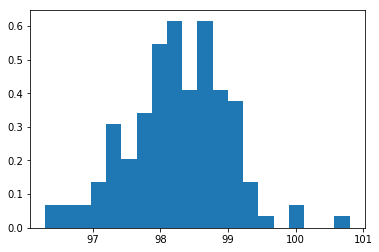

In [17]:
# Histogram of temperature:

import matplotlib.pyplot as plt

plt.hist(df['temperature'], normed=True, bins=20)

plt.show()

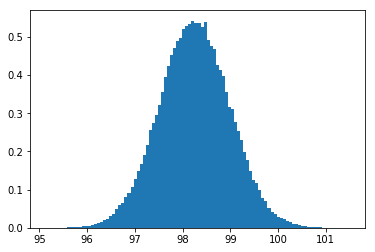

In [27]:
# Normal distribution for mean and standard deviation in the sample (theoretical):

samples_temp = np.random.normal(df['temperature'].mean(), df['temperature'].std(), size=100000)

plt.hist(samples_temp, normed=True, bins=100)

plt.show()

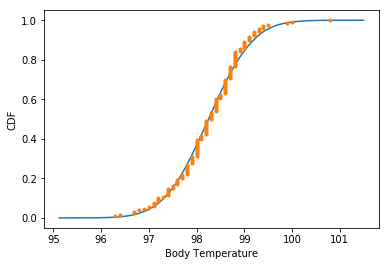

In [34]:
# Function to provide x and y for ECDF

def ecdf(data):
    """Compute ECDF for a one-dimensional array."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(samples_temp)

# Create an ECDF from real data: x, y
x, y = ecdf(df['temperature'])


# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

plt.xlabel('Body Temperature')
plt.ylabel('CDF')

plt.show()


From graphical test, the sample data is likel normally distributed.

In [45]:
# Back-of-the-envelop test:

std_temp = df['temperature'].std()
mean_temp = df['temperature'].mean()
max_temp = df['temperature'].max()
min_temp = df['temperature'].min()

zscore_max = (max_temp - mean_temp) / std_temp
zscore_min = (min_temp - mean_temp) / std_temp

zscore_max

3.4790341305599481

In [47]:
# Calculating proportion of data that is equal or higher than 3 standard deviations: 

# temperature at 3s from the mean:
temp_3s = df['temperature'].mean() + 3 * df['temperature'].std()

#proportion:

prop = np.sum(df['temperature'] >= temp_3s)/len(df['temperature'])

prop

0.0076923076923076927

The temperature feature follows approximately the 68–95–99.7 rule (0.7% of the data is higher than 3s, nothing is lower than -3s)

Discuss with Andrei: frequentist methods

In [49]:
# Skewness:

from scipy.stats import skew

temp_skew = skew(df['temperature'])
temp_skew


-0.004367976879081625

Skewness close to zero

In [55]:
# kurtosis
from scipy.stats import kurtosis

temp_kurt = kurtosis(df['temperature'], fisher=True)
temp_kurt

0.7049597854114693

Discuss with Andrei: Can it still be considered a normal distribution with this kurtosis?